<a href="https://colab.research.google.com/github/CaseySobon/Image-classification/blob/main/Cat_vs_dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/test1.zip'

!mkdir test1/images
!find test1 -maxdepth 1 -type f | xargs -I{} mv {} test1/images

In [ ]:
!unzip '/content/drive/MyDrive/train.zip'

!mkdir train/{dog,cat}
!find train -maxdepth 1 -type f | grep 'dog' | xargs -I{} mv {} train/dog
!find train -maxdepth 1 -type f | grep 'cat' | xargs -I{} mv {} train/cat

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import pathlib
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import plotly
import plotly.express as px
from keras.utils import plot_model

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns
# where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
train_dir = './train'
total_train = len(os.listdir('./train/dog')) + len(os.listdir('./train/cat'))
total_test = len(os.listdir('./test1/images/'))
validation_split = 0.2

batch_size = 128
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           validation_split=validation_split)
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            subset='training')
val_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            class_mode='binary',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,
                                                                IMG_WIDTH, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

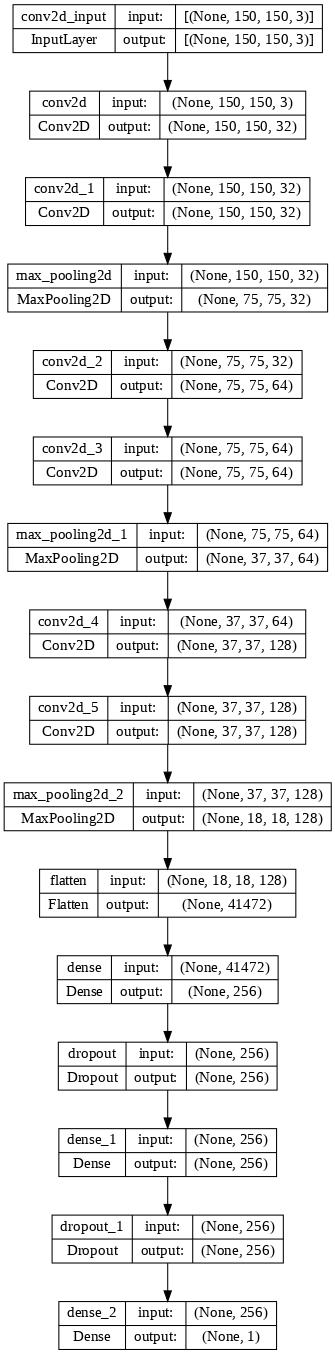

In [ ]:
plot_model(model, show_shapes=True, dpi=75)

In [ ]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    steps_per_epoch=(total_train * (1 - validation_split) // batch_size),
    validation_steps=(total_train * validation_split // batch_size)
)

Epoch 1/10
156/156 [==============================] - 93s 508ms/step - loss: 0.6985 - accuracy: 0.4961 - val_loss: 0.6923 - val_accuracy: 0.5062
Epoch 2/10
156/156 [==============================] - 77s 495ms/step - loss: 0.6827 - accuracy: 0.5566 - val_loss: 0.6827 - val_accuracy: 0.5611
Epoch 3/10
156/156 [==============================] - 77s 493ms/step - loss: 0.6788 - accuracy: 0.5709 - val_loss: 0.6506 - val_accuracy: 0.6280
Epoch 4/10
156/156 [==============================] - 78s 501ms/step - loss: 0.6334 - accuracy: 0.6421 - val_loss: 0.6008 - val_accuracy: 0.6801
Epoch 5/10
156/156 [==============================] - 77s 492ms/step - loss: 0.5737 - accuracy: 0.7063 - val_loss: 0.5441 - val_accuracy: 0.7242
Epoch 6/10
156/156 [==============================] - 78s 497ms/step - loss: 0.5093 - accuracy: 0.7498 - val_loss: 0.4729 - val_accuracy: 0.7762
Epoch 7/10
156/156 [==============================] - 78s 497ms/step - loss: 0.4449 - accuracy: 0.7972 - val_loss: 0.4475 - val_ac

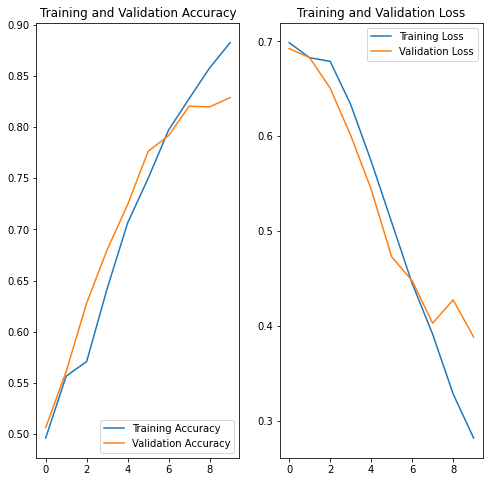

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(directory='./test1/',
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            shuffle=False,
                                            class_mode=None,
                                            batch_size=1)

Found 12500 images belonging to 1 classes.


In [ ]:
test_data_gen.reset()
predictions = model.predict(test_data_gen,
                            steps=total_test,
                            verbose=1)

12500/12500 [==============================] - 57s 5ms/step


In [ ]:
train_data_gen.class_indices

{'cat': 0, 'dog': 1}

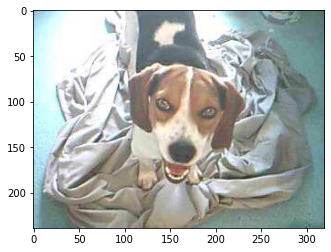

[1.]


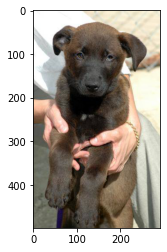

[0.]


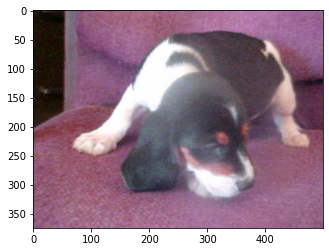

[0.]


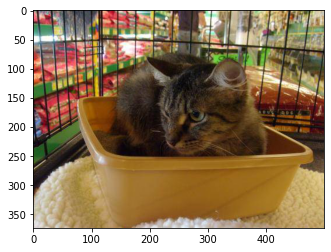

[1.]


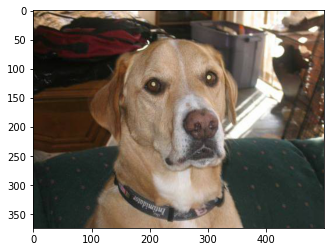

[1.]


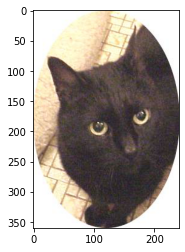

[1.]


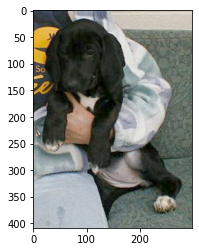

[0.]


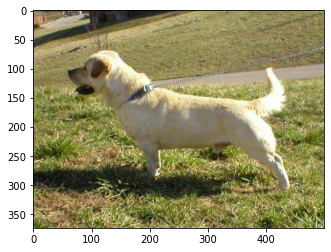

[1.]


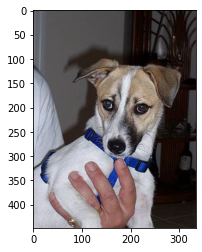

[0.]


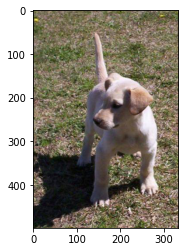

[0.]


In [ ]:
test_path = pathlib.Path('./test1/images')
paths = [str(f) for f in test_path.glob('*')]
for path, pred in list(zip(paths, np.round(predictions)))[:10]:
  plt.imshow(Image.open(path))
  plt.show()
  print(pred)

In [ ]:
def extract_test_id(path):
   file = path.split('/')[1]
   return file.split('.')[0]

test_ids = [extract_test_id(f) for f in test_data_gen.filenames]

In [ ]:
zipped = zip(test_ids, np.round(predictions.flatten()))
records = sorted(list(zipped), key=lambda kv: int(kv[0]))

In [ ]:
output = pd.DataFrame.from_records(records, columns=['id', 'label'])
output.to_csv('submission.csv', index=False)